# Super Mario Bros RL: Traveling Through Varying Difficulties
## Author: Alberto Campos

#### Building Upon the gym-super-mario-bros 7.4.0 Environment https://pypi.org/project/gym-super-mario-bros/

## Preparing the Enviornment

In [1]:
#Installations Needed to Run the Project

#Install mario gym env
!pip install gym_super_mario_bros==7.4.0 nes_py
!pip install gym==0.23.1
#Install numpy
!pip install numpy==1.20.0            
#Install pytorch
!pip3 install torch torchvision torchaudio
#Install stable baselines for RL models 
!pip install 'stable-baselines3'


  Using cached gym-0.23.1-py3-none-any.whl
  Attempting uninstall: gym
    Found existing installation: gym 0.21.0
    Uninstalling gym-0.21.0:
      Successfully uninstalled gym-0.21.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
stable-baselines3 1.6.0 requires gym==0.21, but you have gym 0.23.1 which is incompatible.
  Using cached torch-1.10.1-cp39-none-macosx_10_9_x86_64.whl (147.1 MB)
  Attempting uninstall: torch
    Found existing installation: torch 2.1.1
    Uninstalling torch-2.1.1:
      Successfully uninstalled torch-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
stable-baselines3 1.6.0 requires gym==0.21, but you have gym 0.23.1 which is incompatible.
stable-baselines3 1.6.0 requires torch>=1.11, but you have tor

In [2]:
#Imports Needed to Run the Environment

#Gym Env:
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT, COMPLEX_MOVEMENT

#Preproccessing
from gym.wrappers import GrayScaleObservation, FrameStack, ResizeObservation

#Import Matplotlib
from matplotlib import pyplot as plt

#Data Training
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.vec_env import VecVideoRecorder, DummyVecEnv

#File path usage
import os

#Import RL algorithms
from stable_baselines3 import PPO, A2C

#Modifying Reward Functions
from stable_baselines3.common.cmd_util import make_vec_env
from gym import Wrapper
from stable_baselines3.common.atari_wrappers import AtariWrapper

/Users/albertocampos/opt/anaconda3/lib/python3.9/site-packages/stable_baselines3/common/cmd_util.py:5: FutureWarning: Module ``common.cmd_util`` has been renamed to ``common.env_util`` and will be removed in the future.
  warnings.warn(


## Basic look at Enviornment

In [3]:
env = gym_super_mario_bros.make('SuperMarioBros2-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [4]:
env.action_space

Discrete(7)

In [5]:
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [6]:
env.observation_space.shape

(240, 256, 3)

## Preprocessing the Environment

In [7]:
#Creating base environment
env = gym_super_mario_bros.make('SuperMarioBros2-v0')
#Limiting controls
env = JoypadSpace(env, SIMPLE_MOVEMENT)

state = env.reset();
state.shape

(240, 256, 3)

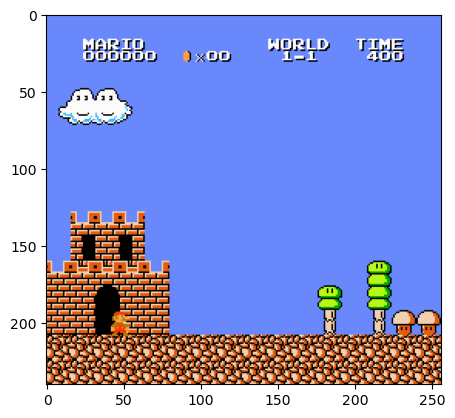

In [8]:
plt.imshow(state)

In [9]:
#Applying Grayscale
env = GrayScaleObservation(env, keep_dim=True)

state = env.reset();
state.shape

(240, 256, 1)

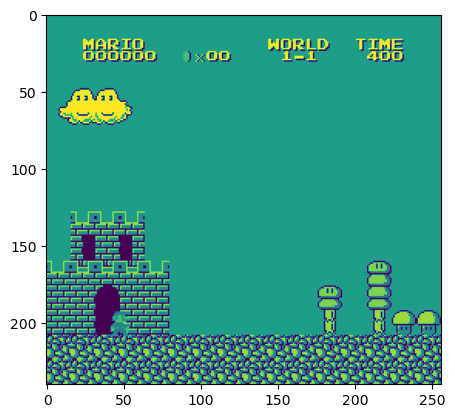

In [10]:
plt.imshow(state)

In [11]:
#Resizing observations 
env = ResizeObservation(env, shape=84) 

#Creating 4 Stack Frames
env = FrameStack(env, 4)

state = env.reset()
state.shape

(4, 84, 84, 1)

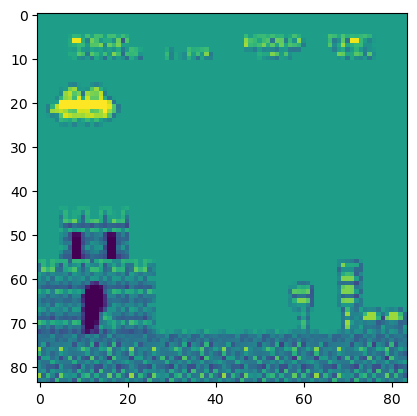

In [12]:
plt.imshow(state[3])

## Setting Up The Enviornment 

In [13]:
def create_mario_env(level): 
    
    if(level == "SMB"):
        env = gym_super_mario_bros.make('SuperMarioBros-v0')
    else:
        env = gym_super_mario_bros.make('SuperMarioBros2-v0')
   
    env = JoypadSpace(env, SIMPLE_MOVEMENT)
 
    env = GrayScaleObservation(env, keep_dim=True)

    env = ResizeObservation(env, shape=84) 
  
    env = FrameStack(env, 4)
    
    return env


## Setting Up Training Data Saver 

In [14]:
class DataSaverCallback(BaseCallback):
  
    def __init__(self, name, rate, path, total_steps, verbose=1):
        super(DataSaverCallback, self).__init__(verbose)
        self.name = name
        self.saving_rate = rate
        self.saving_path = path
        self.max_steps = total_steps
        
    def _on_step(self) -> bool:
                
        if(self.max_steps != self.n_calls and self.n_calls % self.saving_rate == 0):
            train_save_path = os.path.join(self.saving_path, self.name, str(self.n_calls))
            self.model.save(train_save_path)
              
        return True
    
    
    def _on_training_end(self) -> None:
        
        train_save_path = os.path.join(self.saving_path, self.name, str(self.n_calls))
        self.model.save(train_save_path)


# Training the RL Models

In [15]:
mario_game = "SMB"
#mario_game = "LL"
env = create_mario_env(mario_game)

In [16]:
saving_path = "./training/" + mario_game + "/"
final_log_path = "./train_logs/" + mario_game + "/"

## Model 1: PPO

In [17]:
algorithm_name = "PPO"
model_policy = "MlpPolicy"
algo_and_policy = algorithm_name + "_" + model_policy
train_path = saving_path + algo_and_policy 

total_steps = 1024
saving_rate = 1024

model = PPO(model_policy, env, learning_rate = 0.000001, n_steps=512, tensorboard_log=final_log_path, verbose=1)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


## Model 2: A2C

In [18]:
algorithm_name = "A2C"
model_policy = "MlpPolicy"
algo_and_policy = algorithm_name + "_" + model_policy
train_path = saving_path + algo_and_policy

total_steps = 1024
saving_rate = 1024

model = A2C(model_policy, env, learning_rate = 0.000001, n_steps=512, tensorboard_log=final_log_path, verbose=1)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


## Learn the Selected Model

In [19]:
model.learn(total_timesteps=total_steps, callback = DataSaverCallback(algo_and_policy, saving_rate, saving_path, total_steps))

Logging to ./train_logs/SMB/A2C_1


/Users/albertocampos/opt/anaconda3/lib/python3.9/site-packages/stable_baselines3/common/save_util.py:276: UserWarning: Path 'training/SMB/A2C_MlpPolicy' does not exist. Will create it.
  warnings.warn(f"Path '{path.parent}' does not exist. Will create it.")


# Modifying The Orignal Reward Function

In [20]:
class CustomizedReward(Wrapper):
    
    def __init__(self, env):
        super(CustomizedReward, self).__init__(env)
        self._current_score = 0
        self.prev_status = 'small'
        self.prev_coins = 0
        self.max_distance = 0
        self.prev_pos = 0
       
    def step(self, action):
        state, reward, done, info = self.env.step(action)
        
        if(info['coins'] != self.prev_coins):
            reward += 2
            
        if(info['status'] != 'small' and info['status'] != self.prev_status):
            reward += 2
                        
        if(info['x_pos'] > self.max_distance):
            reward += 5
            self.max_distance = info['x_pos']
        
        if(info['x_pos'] == self.prev_pos):
            reward -= 1
            
        if(info['x_pos'] < self.prev_pos):
            reward -= .5
            
        if(info['flag_get'] is True): 
            reward += 500
            
        self.prev_coins = info['coins']
        self.prev_status = info['status']
        self.prev_pos = info['x_pos']
              
        return state, reward, done, info

    def reset(self):
        return self.env.reset()

In [21]:

def create_mod_mario_env(level): 
    
    if(level == "SMB"):
        env = gym_super_mario_bros.make('SuperMarioBros-v0')
    else:
        env = gym_super_mario_bros.make('SuperMarioBros2-v0')
        
    env = JoypadSpace(env, SIMPLE_MOVEMENT)
    
    env = AtariWrapper(env, terminal_on_life_loss=False, clip_reward= {+15, 0, -15} )
    
    env = CustomizedReward(env)
    
    env = ResizeObservation(env, shape=84) 
  
    env = FrameStack(env, 4)
    
    return env


# Training Models with new Reward Function

In [22]:
mario_game = "SMB"
#mario_game = "LL"
env = create_mod_mario_env(mario_game)

In [23]:
saving_path = "./training/" + mario_game + "MOD_R" + "/"
final_log_path = "./train_logs/" + mario_game + "MOD_R" + "/"

## Model 1: PPO

In [24]:
algorithm_name = "PPO"
model_policy = "MlpPolicy"
algo_and_policy = algorithm_name + "_" + model_policy
train_path = saving_path + algo_and_policy 

total_steps = 1024
saving_rate = 1024

model = PPO(model_policy, env, learning_rate = 0.000001, n_steps=512, tensorboard_log=final_log_path, verbose=1)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


## Model 2: A2C

In [25]:
algorithm_name = "A2C"
model_policy = "MlpPolicy"
algo_and_policy = algorithm_name + "_" + model_policy
train_path = saving_path + algo_and_policy

total_steps = 1024
saving_rate = 1024

model = A2C(model_policy, env, learning_rate = 0.000001, n_steps=512, tensorboard_log=final_log_path, verbose=1)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


## Learn the Selected Model

In [26]:
model.learn(total_timesteps=total_steps, callback = DataSaverCallback(algo_and_policy, saving_rate, saving_path, total_steps))

Logging to ./train_logs/SMBMOD_R/A2C_1


/Users/albertocampos/opt/anaconda3/lib/python3.9/site-packages/stable_baselines3/common/save_util.py:276: UserWarning: Path 'training/SMBMOD_R/A2C_MlpPolicy' does not exist. Will create it.
  warnings.warn(f"Path '{path.parent}' does not exist. Will create it.")


# Testing and Recording the RL Models

## Game Selection

In [27]:
mario_game = "SMB"
#mario_game = "LL"

## Model Selection

In [28]:
algorithm_name = "PPO"
model_policy = "MlpPolicy"
algo_and_policy = algorithm_name + "_" + model_policy
total_steps = 1024

In [29]:
algorithm_name = "A2C"
model_policy = "MlpPolicy"
algo_and_policy = algorithm_name + "_" + model_policy
total_steps = 1024

## Select Reward Function

### Trained on Regular Rewards:

In [30]:
saving_path = "./training/" + mario_game + "/"
reg = "True"

In [31]:
train_path = saving_path + algo_and_policy 
model_path =  train_path + "/" + str(total_steps)

if algorithm_name == "PPO":
    model = PPO.load(model_path)
else:
    model = A2C.load(model_path)
    
model_dir = algo_and_policy

### Trained on Modified Rewards:

In [32]:
saving_path = "./training/" + mario_game + "MOD_R" + "/"
reg = "False"

In [33]:
train_path = saving_path + algo_and_policy 
model_path =  train_path + "/" + str(total_steps)

if algorithm_name == "PPO":
    model = PPO.load(model_path)
else:
    model = A2C.load(model_path)
    
model_dir = "ModR_" + algo_and_policy

# Load Testing Data

In [34]:
env_id = mario_game
video_folder = "./testing/videos/" + mario_game + "/"
inital_episode_count = total_steps

if reg == "True": 
    vec_env = DummyVecEnv([lambda: create_mario_env(mario_game)])
else:
    vec_env = DummyVecEnv([lambda: create_mod_mario_env(mario_game)])
    
vec_env = VecVideoRecorder(vec_env, video_folder,
                           record_video_trigger=lambda x: x == 0, video_length=inital_episode_count,
                           name_prefix=f"{model_dir}")
    

## Run and Record Test Data

In [35]:
episode_count = inital_episode_count
obs = vec_env.reset()

max_x_pos_reached = 0
max_x_pos_reached_ep_count = 0
lives_used_by_max_x_pos = 0

info_in_max = None
rewards_in_max = None
reward_list = []
scores_per_life = []
coins_per_life = []
powerUps_per_life = []


life = 2
total_lives_used = 0

prev_score = 0
cur_powerUp_count = 0
prev_status = None

while episode_count > 1:   
    
    action, _ = model.predict(obs)
    obs, rewards, _, info = vec_env.step(action)  
        
    if(info[0]['status'] != 'small' and info[0]['status'] != prev_status):
        cur_powerUp_count += 1 
        prev_status = info[0]['status']
  
    if(info[0]['life'] != life):
        scores_per_life.append(prev_score)
        life = info[0]['life']
        coins_per_life.append(prev_coins)
        
        powerUps_per_life.append(cur_powerUp_count)
        cur_powerUp_count = 0
        
        total_lives_used += 1
        
    prev_coins = info[0]['coins'] 
    prev_score = info[0]['score']
        
    reward_list.append(rewards[0])
    
    if(info[0]['x_pos'] > max_x_pos_reached):
        max_x_pos_reached = info[0]['x_pos']
        max_x_pos_reached_ep_count = episode_count
        info_in_max = info
        rewards_in_max = rewards
        lives_used_by_max_x_pos = total_lives_used
                    
    if(info[0]['flag_get'] is True):  
        
        if not os.path.isfile("Models_That_Completed_Level.txt"):
            f = open("Models_That_Completed_Level.txt", "w") 
        else:
            f = open("Models_That_Completed_Level.txt", "a")
        
        f.write(f"\nGame:{mario_game},Model:{model_dir}-steps-0-to-step-{inital_episode_count}\ninfo:{info}, epsiode count when reached: {max_x_pos_reached_ep_count}")
        f.close()
        break
           
              
    episode_count -= 1
    

ave_rewards = sum(reward_list)/len(reward_list)
    
if(len(scores_per_life) == 0):
    ave_score = 0
else:
    ave_score = sum(scores_per_life)/len(scores_per_life)
    
if(len(coins_per_life) == 0):
    ave_coins = 0
else:
    ave_coins = sum(coins_per_life)/len(coins_per_life)

if(len(powerUps_per_life) == 0):
    ave_powerUps = 0
else:
    ave_powerUps = sum(powerUps_per_life)/len(powerUps_per_life)
    
if not os.path.isdir("./testing/data/" + mario_game +"/"):  
    os.makedirs("./testing/data/" + mario_game +"/")
        
#Save Collected and Calculated Test Data
file_path = "./testing/data/" +  mario_game + "/" + model_dir + str(inital_episode_count)
f = open(file_path, "a")
f.write(f"\nModel:{model_dir}-steps-0-to-step-{inital_episode_count}\nMax x-axis reached:{max_x_pos_reached}, epsiode count when reached: {max_x_pos_reached_ep_count}, lives used to reach: {lives_used_by_max_x_pos}\ntotal_rewards:{sum(reward_list)}, Total_coins:{sum(coins_per_life)}, Total_PowerUps:{sum(powerUps_per_life)}, Total_lives_used:{total_lives_used}\nbestrun_info:{info_in_max}\nbestrun_rewards:{rewards_in_max}\nTestAverage_Reward_PL: {ave_rewards}, TestAverage_Score_PL: {ave_score}\nTestAverage_Coins_PL: {ave_coins}, TestAverage_PowerUps_PL: {ave_powerUps}\n")
f.close()
    
#Save Test Recording 
vec_env.close()

## Restart Kernel to Run a new Test